In [1]:
import sys
sys.path.insert(1, '/home/msantolaria/Documents/MyPythonLibrary/ClimAnag/')
import climbasis as climb
from climbasis import *
import domain as dom
import myplot
import glob
from myplot import *

# In[3]:


source='/home/msantolaria/Documents/MyResearch/GabiSAM/UBSam/'
resultsDir=source + 'Results/'
plotsDir=source + 'Plots/'


#resultsDir='/media/maria/MARIAEXT2/WinterTrendsObs/'
sourceData='/home/msantolaria/Documents/Data/'


In [2]:
!ls /home/msantolaria/Documents/Data/eraint/

1979.sh
download_eraint.py
download.py
era_interim_moda_1970
era_interim_moda_1970-2010
era_interim_moda_1970-2010_v1
era_interim_moda_1980
era_interim_moda_1990
era_interim_moda_2000
era_interim_moda_2010
mslp.mon.eraint_197901_201512.nc
mslp.mon.eraint_197901_201512_shiftgrid.nc
q850_mon_eraint_1979-2015.nc
q850_mon_eraint_1979-2015_shiftgrid.nc
q925.mon.eraint_197901_201512.nc
q925.mon.eraint_197901_201512_shiftgrid.nc
select_vars.sh
t850_mon_eraint_1979-2015.nc
t850_mon_eraint_1979-2015_shiftgrid.nc
t925.mon.eraint_197901_201512.nc
t925.mon.eraint_197901_201512_shiftgrid.nc
u850_mon_eraint_1979-2015.nc
u850_mon_eraint_1979-2015_shiftgrid.nc
u925.mon.eraint_197901_201512.nc
u925.mon.eraint_197901_201512_shiftgrid.nc
v850_mon_eraint_1979-2015.nc
v850_mon_eraint_1979-2015_shiftgrid.nc
v925.mon.eraint_197901_201512.nc
v925.mon.eraint_197901_201512_shiftgrid.nc
Z500_mon.eraint_197901_201908.nc
z500_mon_eraint_1979-2015.nc
z500_mon_eraint_1979-2015_shiftgrid.nc


In [3]:
iyr=1980
fyr=2014
mapa=True

domain='SHWest'
variable='t925'
units='K'
model=str('eraint')
fileName ='t925.mon.eraint_197901_201512.nc'
ds = xr.open_dataset(sourceData+model+'/'+fileName)['t']

ds = ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180))
ds = ds.roll(longitude=int(len(ds['longitude']) / 2), roll_coords=True)
#field=dom.field_dom(ds,domain)

lat,lon=climb.latlon(ds)
ylat=ds.coords['latitude']
xlon=ds.coords['longitude']

field=ds.sel(latitude=slice(-20,-90),longitude=slice(-170,-10))
#latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)
#field=dom.field_sel_dom(ds,domain)
print(ds.units)



#clim=vals.mean('time')
#std=vals.std('time')
#std_det=anoms_detrend.std('time')
#--------------------------------


K


In [4]:
#-----------------------------------------
rList=[]
pList=[]
#Regression
sourceIndex='/home/msantolaria/Documents/MyResearch/MassBalanceSAM/UBSam/Index/'
mode='SAM'
seasons=['DJF','MAM','JJA','SON']
for season in seasons:
    if season=='DJF':
        indexName=mode+'_'+season+'_19791980_20132014.txt'
        index=np.loadtxt(sourceIndex+indexName)
        print(indexName)
        print(index.shape)
        vals,anoms=climb.seasonal_selection(field,season,iyr-1,fyr)
        anoms_detrend=climb.detrend_dim(vals, 'time', deg=1)
    else:
        indexName=mode+'_'+season+'_1980_2014.txt'
        index=np.loadtxt(sourceIndex+indexName)
        print(indexName)
        print(index.shape)
        vals,anoms=climb.seasonal_selection(field,season,iyr,fyr)
        anoms_detrend=climb.detrend_dim(vals, 'time', deg=1)
    par=climb.trend_vect(index,anoms,'time')
    #trend=par[0]
    #intercept=par[1]
    rvalue=par[2]
    pvalue=par[3]
    #stderr=par[4]
    rList.append(rvalue)
    pList.append(pvalue)

SAM_DJF_19791980_20132014.txt
(35,)
(D- 1979  JF- 1980  to D- 2013 JF- 2014
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
SAM_MAM_1980_2014.txt
(35,)
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
SAM_JJA_1980_2014.txt
(35,)
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
SAM_SON_1980_2014.txt
(35,)
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


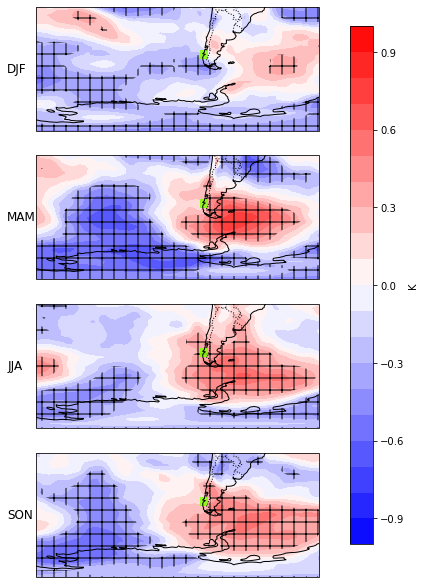

In [6]:
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)
nrows=4
ncols=1
clevs=np.arange(-1.0,1.1,0.1)
#color='PiYG'
cmap='bwr'
exp='obs'
decomp='original'
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(16,18))
axs=axs.flatten()
#Loop over all of the models
for i in np.arange(0,len(rList),1):
        lat,lon=climb.latlon(rList[i])
        lons, lats = np.meshgrid(rList[i][lon],rList[i][lat])
        # Contour plot
        CS1=axs[i].contourf(lons, lats, rList[i],clevs,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap)
        levels=[0,0.1,1.0]
        cs = axs[i].contourf(lons,lats,pList[i][:,:], transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)
        # Title each subplot with the name of the model
        axs[i].text(-0.1, 0.5, seasons[i],
        verticalalignment='center', horizontalalignment='left',
        transform=axs[i].transAxes,
        color='black', fontsize=12)
        geom = geometry.box(minx=-77,maxx=-73,miny=-44.7,maxy=-49.3)
        axs[i].add_geometries([geom], facecolor='chartreuse',edgecolor='chartreuse',crs=ccrs.PlateCarree(), alpha=0.8)
        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
        axs[i].add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='none'))
        axs[i].set_extent([lonW, lonE, latS,latN])
    # Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.20, top=0.64, left=0.25, right=0.75,
                    wspace=0.0000000005, hspace=0.20)

#plt.tight_layout()
#cax=fig.add_axes([left,bottom,width,height]
#cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])
#cbar=fig.colorbar(CS1,cax=cbar_ax,orientation='horizontal',label='%s'%(units))
cbar_ax = fig.add_axes([0.65, 0.225, 0.02, 0.4])
cbar=fig.colorbar(CS1,cax=cbar_ax,orientation='vertical',label='%s'%(units))
#plt.suptitle('%s'%(plotname))



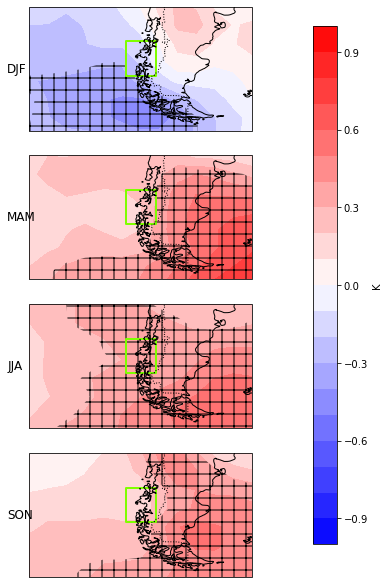

In [9]:
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)
nrows=4
ncols=1
clevs=np.arange(-1.0,1.1,0.1)
#color='PiYG'
cmap='bwr'
exp='obs'
decomp='original'
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(16,18))
axs=axs.flatten()
#Loop over all of the models
for i in np.arange(0,len(rList),1):
        lat,lon=climb.latlon(rList[i])
        lons, lats = np.meshgrid(rList[i][lon],rList[i][lat])
        # Contour plot
        CS1=axs[i].contourf(lons, lats, rList[i],clevs,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap)
        levels=[0,0.1,1.0]
        cs = axs[i].contourf(lons,lats,pList[i][:,:], transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)
        # Title each subplot with the name of the model
        axs[i].text(-0.1, 0.5, seasons[i],
        verticalalignment='center', horizontalalignment='left',
        transform=axs[i].transAxes,
        color='black', fontsize=12)
        geom = geometry.box(minx=-77,maxx=-73,miny=-44.7,maxy=-49.3)
        axs[i].add_geometries([geom], facecolor='None',edgecolor='chartreuse',crs=ccrs.PlateCarree(),linewidth=2, alpha=1.0)
        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
        axs[i].add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='none'))
        #axs[i].set_extent([lonW, lonE, latS,latN])
        axs[i].set_extent([-90, -60, -56,-40])
    # Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.20, top=0.64, left=0.25, right=0.75,
                    wspace=0.0000000005, hspace=0.20)

#plt.tight_layout()
#cax=fig.add_axes([left,bottom,width,height]
#cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])
#cbar=fig.colorbar(CS1,cax=cbar_ax,orientation='horizontal',label='%s'%(units))
cbar_ax = fig.add_axes([0.65, 0.225, 0.02, 0.4])
cbar=fig.colorbar(CS1,cax=cbar_ax,orientation='vertical',label='%s'%(units))
#plt.suptitle('%s'%(plotname))


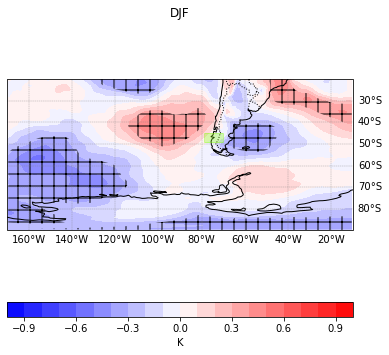

In [45]:

#------------------------------------
clevsT=np.arange(-1.0,1.1,0.1)
#color='PiYG'
color='bwr'
exp='obs'
decomp='original'
i=0
lat,lon=climb.latlon(rList[i])
#figtrend=myplot.oneplot_rvalue(variable=variable, decomp=decomp, exp=exp, model=model, clevs=clevsT, units=units, subdomain=subdomain, par=par, xlon=par[0][lon], ylat=par[0][lat], season=season, iyr=iyr, fyr=fyr,extent=mapa)

latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(subdomain)
fig,axs= plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(8,10))

lons, lats = np.meshgrid(rList[i][lon],par[i][lat])

CS1=axs.contourf(lons,lats, rList[i][:,:],clevsT,
                transform=ccrs.PlateCarree(),
                cmap=color,extent='both')
levels=[0,0.1,1.0]
cs = axs.contourf(lons,lats,pList[i][:,:], transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)
    # Draw the coastines for each subplot
axs.coastlines()
axs.add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
    #axs.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='None', facecolor='None'))
axs.set_extent([lonW, lonE, latS,latN])
        # Longitude and latitude labels
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.4, color='grey', alpha=0.8, linestyle='--')
gl.top_labels = False
gl.left_labels = False
gl.xlines = True
gl.ylines = True
#gl.xlocator = mticker.FixedLocator([-180,-10])
#gl.ylocator = mticker.FixedLocator([-20,-90])
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
#gl.xlim(80, 120)
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
    # Adjust the location of the subplots on the page to make room for the colorbar
geom = geometry.box(minx=-79,maxx=-70,miny=-44.7,maxy=-49.3)
axs.add_geometries([geom], facecolor='chartreuse',edgecolor='chartreuse',crs=ccrs.PlateCarree(), alpha=0.3)
fig.subplots_adjust(bottom=0.35, top=0.7, left=0.20, right=0.80,
                    wspace=0.05, hspace=0.5)
    # Add a colorbar axis at the bottom of the graph
    #([xmin,ymin,dx,dy])
cbar_ax = fig.add_axes([0.2, 0.3, 0.6, 0.02])
    # Draw the colorbar
cbar=fig.colorbar(CS1, cax=cbar_ax,orientation='horizontal',label='%s'%(units))
    ## Add a big title at the top
plt.suptitle('%s'%(seasons[i]),y=0.73)

plt.show()